In [2]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

(512, 512)


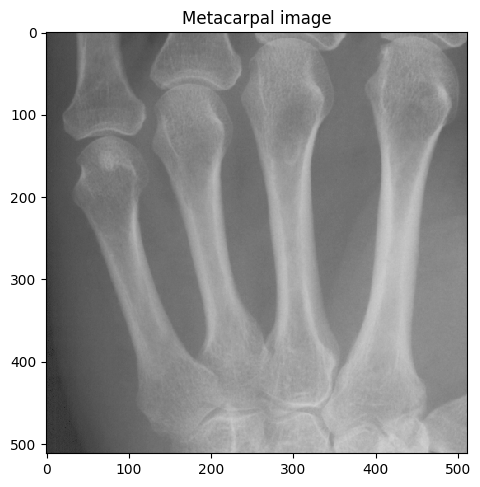

In [3]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)



print(im_org.shape)

io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

In [ ]:
# Same thing, but with colourmap
io.imshow(im_org, cmap="jet")
plt.title('Metacarpal image (with colormap)')
io.show()

In [ ]:
# More gray scaling
io.imshow(im_org, vmin=20, vmax=170)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

In [ ]:
# Exercise 7
min = np.min(im_org)
max = np.max(im_org)

io.imshow(im_org, vmin = min, vmax = max)
io.show()

In [ ]:
# Histogram
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

In [ ]:
# Connecting the histogram to variablename
h = plt.hist(im_org.ravel(), bins=256)

In [ ]:
# Checking number of values in certain bins
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

In [ ]:
# Seeing binedges for certain bins
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")

In [ ]:
# Extracting variables from histogram
y, x, _ = plt.hist(im_org.ravel(), bins=256)
bin_max = np.argmax(y)
bin_left = h[1][bin_max]
bin_right = h[1][bin_max +1]
print(f"Bin edges: {bin_left} to {bin_right}")

In [ ]:
# Checking a pixelvalue
r = 100
c = 50
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

In [ ]:
# Removing certain pixels
im_org[:30] = 0
io.imshow(im_org)
io.show()

In [ ]:
# Binary visual representation based on pixel value
mask = im_org > 150
io.imshow(mask)
io.show()

In [ ]:
# Changes the masks pixelvalues to 255
im_org[mask]  = 255
io.imshow(im_org)
io.show()


In [ ]:
# 
im_ard = io.imread(in_dir + "ardeche.jpg")
r = 110
c = 90
print(im_ard[r, c, 0], im_ard[r,c,1], im_ard[r,c,2])


In [ ]:
im_ard[:300, :, [0,2]] = 0

io.imshow(im_ard)
io.show()

In [ ]:
cat = io.imread(in_dir + "catlaguh.png")
io.imshow(cat)
io.show()

In [ ]:
cat_rescaled = rescale(cat, 0.25, anti_aliasing=True, channel_axis=2)
io.imshow(cat_rescaled)
io.show()

In [ ]:
cat_resized = resize(cat, (cat.shape[0]//4, im_org.shape[1]//6),anti_aliasing=True)

io.imshow(cat_resized)
io.show()

In [ ]:
#Exercise 19

resized = resize(cat, (400,cat.shape[1]), anti_aliasing=True)
io.imshow(resized)
io.show()

In [ ]:
plt.hist(cat.ravel(), bins = 256)
plt.show()

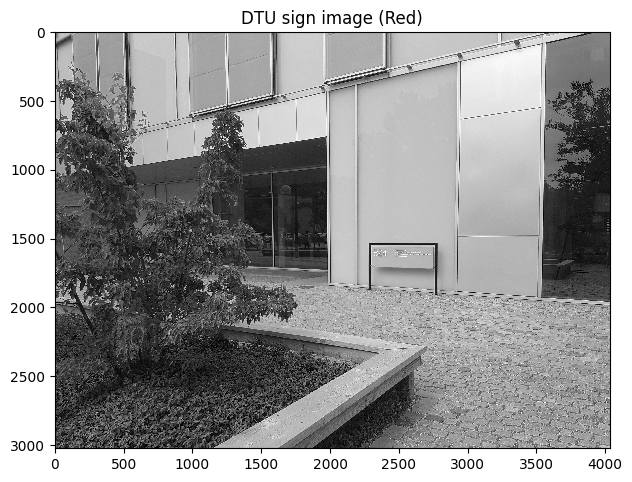

In [137]:
dtusign = io.imread(in_dir + "DTUSign1.jpg")
r_comp = dtusign[:, :, 0]
io.imshow(r_comp)
plt.title('DTU sign image (Red)')
io.show()


In [ ]:
g_comp = dtusign[:,:,1]
io.imshow(g_comp)
io.show()

In [ ]:
b_comp = dtusign[:,:,2]
io.imshow(b_comp)
io.show()

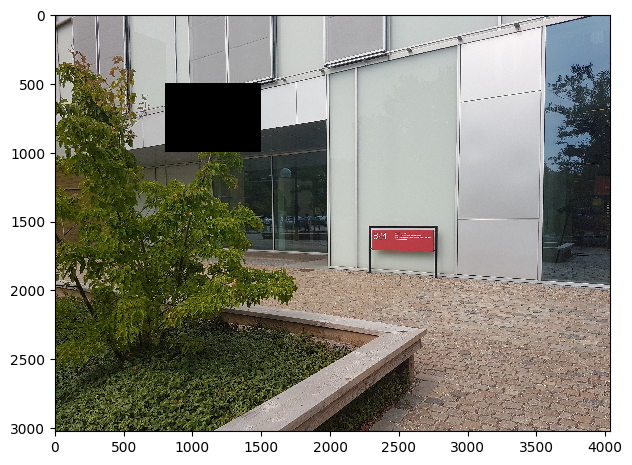

In [131]:
dtusign[500:1000, 800:1500, :] = 0
io.imshow(dtusign)
io.show()

In [ ]:
io.imsave(in_dir + "DTUSign1-marked.png",dtusign)

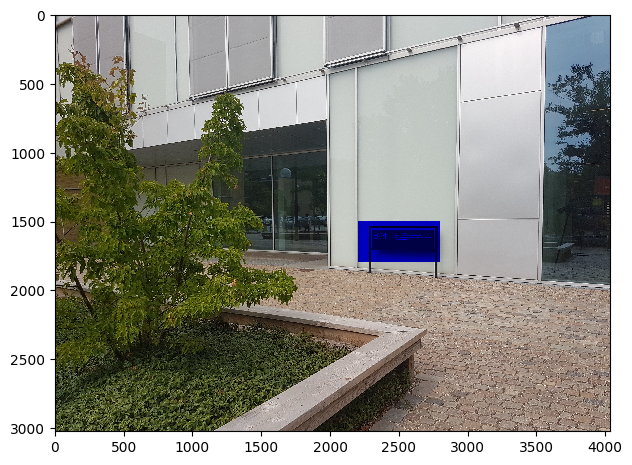

In [138]:
dtusign[1500:1800,2200:2800, [0,1]] = 0
io.imshow(dtusign)
io.show()

In [139]:
io.imsave(in_dir + "DTUSign1-markedblue.png",dtusign)

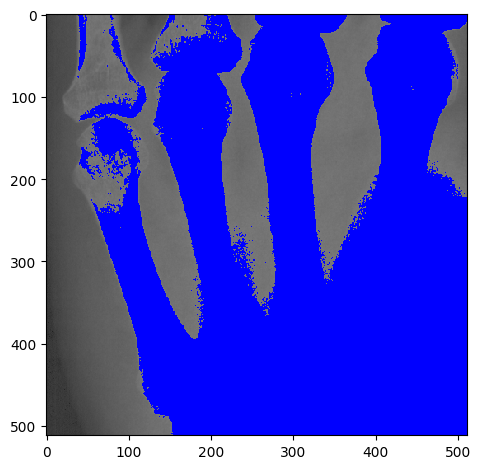

In [171]:
meta = io.imread(in_dir + "metacarpals.png")
metacolor = color.gray2rgb(meta)
mask = meta>120
metacolor[mask] = [0,0,255]
io.imshow(metacolor)
io.show()